In [1]:
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import scipy.stats as st

In [2]:
np.random.seed(0)

In [3]:
pop, ignore_classes = make_gaussian_quantiles(n_samples=1000,
                                              n_features=2,
                                              cov=1,
                                              n_classes=1,
                                              random_state=0      
                                    )

In [61]:
selRandom = lambda: np.random.choice(range(1000), 30, replace=False)
coord = ['X1','Y1','X2','Y2']

samples = {f'sample{n}': pop[:,v][selRandom()] for n,v in list(zip(coord,[0,1]*2))}

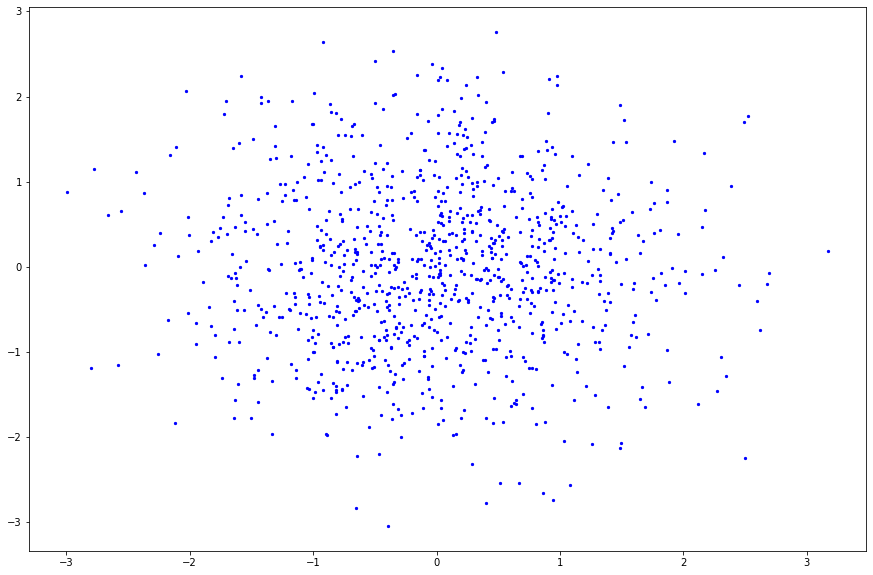

In [62]:
plt.figure(figsize=(15,10))
plt.scatter(pop[:,0], pop[:,1], s=5, color='blue')
plt.show()

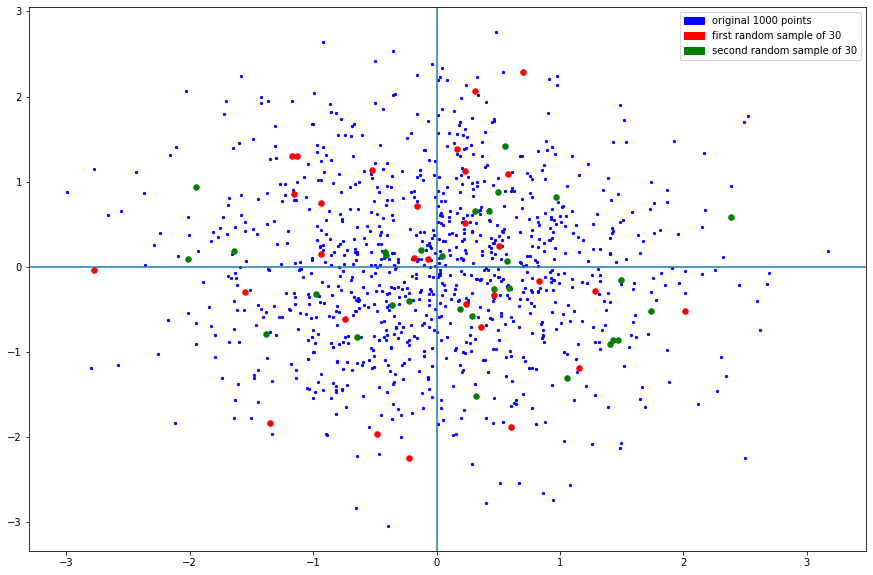

In [69]:
plt.figure(figsize=(15,10))
plt.scatter(pop[:,0],pop[:,1], s=5, color='blue')
plt.scatter(samples['sampleX1'], samples['sampleY1'], s=30, color='red')
plt.scatter(samples['sampleX2'], samples['sampleY2'], s=30, color='green')

bluePatch = mpatches.Patch(color='blue', label='original 1000 points')
redPatch = mpatches.Patch(color='red', label='first random sample of 30')
greenPatch = mpatches.Patch(color='green', label='second random sample of 30')
plt.legend(handles=[bluePatch, redPatch, greenPatch])

plt.axvline(0)
plt.axline((0,0), slope=0)

plt.show()

In [93]:
[(np.mean(i[1]),np.std(i[1])) for i in samples.items() if i[0].startswith('sampleX')]

[(-0.12424232018930682, 0.969229078109307),
 (0.20226607947253517, 1.0680129155698777)]

In [99]:
meanA = np.mean(samples['sampleX1'])
meanB = np.mean(samples['sampleX2'])

stdA = np.std(samples['sampleX1'])
stdB = np.std(samples['sampleX2'])

standardError = np.sqrt((stdA**2)/len(samples['sampleX1']) + (stdB**2)/len(samples['sampleX2']))
difference = meanA - meanB
test_statistic = difference/standardError

crit = st.norm.ppf(0.05/2)*-1
reject_status = 'Reject Null Hypothesis' if crit < test_statistic else 'Fail to Reject'

print(test_statistic, crit, reject_status)

-1.2399877935906707 1.9599639845400545 Fail to Reject
